In [1]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
for dirname, _, filenames in os.walk('D:\Aavishkar\Images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
main_dir = '/content/drive/MyDrive/test'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
validation_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_non_mask_dir = os.path.join(train_dir,'Non Mask')

In [5]:
train_mask_dir_names = os.listdir(train_mask_dir)
train_non_mask_dir_names = os.listdir(train_non_mask_dir)

print(train_mask_dir_names[:10])
print(train_non_mask_dir_names[:10])

['image.jpeg', 'image (1).jpeg', 'images (3).jpeg', 'image (5).jpeg', 'image (2).jpeg', 'images (2).jpeg', 'images (1).jpeg', 'image (4).jpeg', 'image (3).jpeg', 'images (9).jpeg']
['00000082.jpg', '00000068.jpg', '00000075.jpg', '00000086.jpg', '00000087.jpg', '00000069.jpg', '00000085.jpg', '00000077.jpg', '00000105.jpg', '00000100.jpg']


In [6]:
import matplotlib.image as npimg
import matplotlib.pyplot as plt
nrows=4
ncols=4
plt.figure(figsize=(12,12))

mask_pic = []

for i in train_mask_dir_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

no_mask_pic = []

for i in train_non_mask_dir_names[0:8]:
  no_mask_pic.append(os.path.join(train_non_mask_dir,i))

<Figure size 1200x1200 with 0 Axes>

In [7]:
print(mask_pic)
print(no_mask_pic)

['/content/drive/MyDrive/test/Train/Mask/image.jpeg', '/content/drive/MyDrive/test/Train/Mask/image (1).jpeg', '/content/drive/MyDrive/test/Train/Mask/images (3).jpeg', '/content/drive/MyDrive/test/Train/Mask/image (5).jpeg', '/content/drive/MyDrive/test/Train/Mask/image (2).jpeg', '/content/drive/MyDrive/test/Train/Mask/images (2).jpeg', '/content/drive/MyDrive/test/Train/Mask/images (1).jpeg', '/content/drive/MyDrive/test/Train/Mask/image (4).jpeg']
['/content/drive/MyDrive/test/Train/Non Mask/00000082.jpg', '/content/drive/MyDrive/test/Train/Non Mask/00000068.jpg', '/content/drive/MyDrive/test/Train/Non Mask/00000075.jpg', '/content/drive/MyDrive/test/Train/Non Mask/00000086.jpg', '/content/drive/MyDrive/test/Train/Non Mask/00000087.jpg', '/content/drive/MyDrive/test/Train/Non Mask/00000069.jpg', '/content/drive/MyDrive/test/Train/Non Mask/00000085.jpg', '/content/drive/MyDrive/test/Train/Non Mask/00000077.jpg']


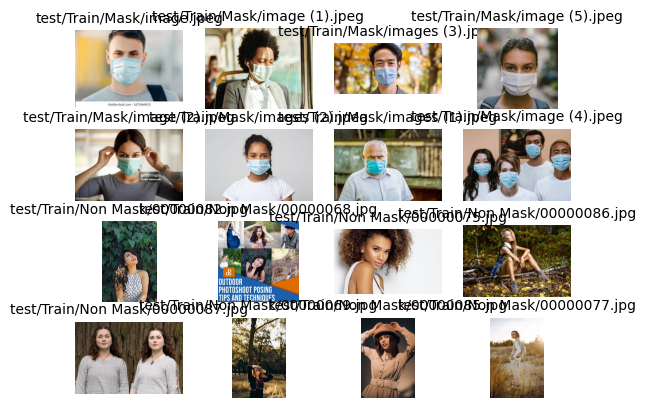

In [8]:
merged_list = mask_pic + no_mask_pic

for i in range(0,len(merged_list)):
  data = merged_list[i].split('/',4)[4]
  sp = plt.subplot(nrows,ncols,i+1)
  plt.axis('Off')
  image = npimg.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')
plt.show()

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   rotation_range=40,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_images_generator = train_datagen.flow_from_directory(train_dir,
                                                           target_size=(180,180),
                                                           batch_size=32,
                                                           class_mode='binary')

test_images_generator = test_datagen.flow_from_directory(test_dir,
                                                           target_size=(180,180),
                                                           batch_size=32,
                                                           class_mode='binary')

valid_images_generator = validation_datagen.flow_from_directory(validation_dir,
                                                           target_size=(180,180),
                                                           batch_size=32,
                                                           class_mode='binary')

Found 61 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [10]:
train_images_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [11]:
train_images_generator.image_shape

(180, 180, 3)

In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(180,180,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 129600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      33,177,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,197,505 (126.64 MB)

 Trainable params: 33,197,505 (126.64 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_images_generator,epochs=100,validation_data=valid_images_generator)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 12s/step - accuracy: 0.3441 - loss: 13.9515 - val_accuracy: 0.5000 - val_loss: 0.7545
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 354ms/step - accuracy: 0.5586 - loss: 4.5849 - val_accuracy: 0.5000 - val_loss: 2.7454
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 363ms/step - accuracy: 0.5676 - loss: 2.9247 - val_accuracy: 0.5000 - val_loss: 1.4735
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 354ms/step - accuracy: 0.5159 - loss: 3.1738 - val_accuracy: 0.5000 - val_loss: 1.0352
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - accuracy: 0.5050 - loss: 1.6293 - val_accuracy: 0.5000 - val_loss: 0.6756
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - accuracy: 0.6127 - loss: 0.9787 - val_accuracy: 0.5000 - val_loss: 0.7219
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 357ms/step - accuracy: 0.4992 - loss: 1.2606 - val_accuracy: 0.5000 - val_loss: 0.6991
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 356ms/step - accuracy: 0.5670 - loss: 0.8999 - val_accuracy: 0.5000 - val_loss: 0.

In [23]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 0, 'Epochs')

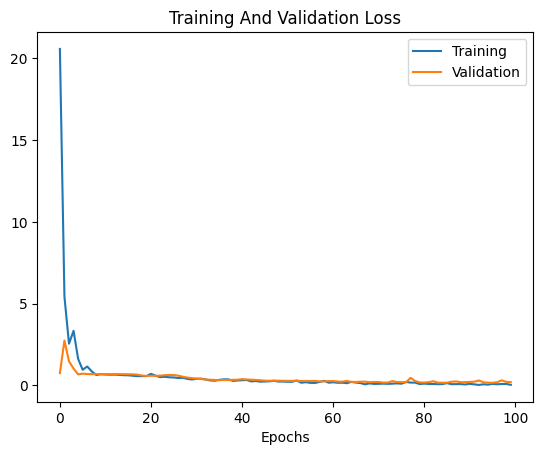

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title("Training And Validation Loss")
plt.xlabel("Epochs")

In [22]:
test_loss , test_acc = model.evaluate(test_images_generator)

print("Test Loss: {} Test Accuracy: {}".format(test_loss,test_acc))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 1.0000 - loss: 0.0456
Test Loss: 0.04562539607286453 Test Accuracy: 1.0


In [23]:
model.save('face_mask_detection.h5')

In [18]:
import matplotlib.image as mpimg
from keras.preprocessing import image
import numpy as np

def test_image_mask_nomask(path):
    im = mpimg.imread(path)
    plt.imshow(im)

    img = image.load_img(path,target_size=(180,180))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    prediction = model.predict(img)
    if prediction == 0:

        print("Person Wearing A Mask")

    else:
        print("Person Not Wearing A Mask")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step
Person Not Wearing A Mask


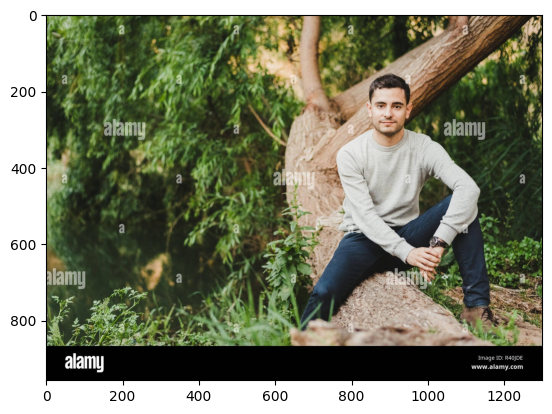

In [19]:
test_image_mask_nomask('/content/drive/MyDrive/test/Test/Non Mask/00000005.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Person Wearing A Mask


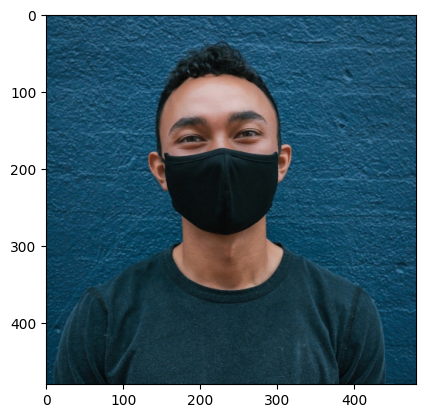

In [36]:
test_image_mask_nomask('/content/drive/MyDrive/test/Train/Mask/black_0.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Person Not Wearing A Mask


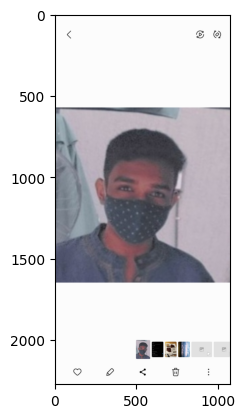

In [34]:
test_image_mask_nomask('/content/drive/MyDrive/test/Validation/Mask/Screenshot_20220826-122137_Gallery.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Person Not Wearing A Mask


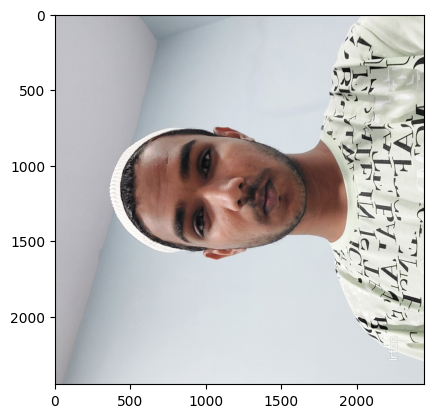

In [38]:
test_image_mask_nomask('/content/drive/MyDrive/test/Validation/Non Mask/20230629_080840.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Person Wearing A Mask


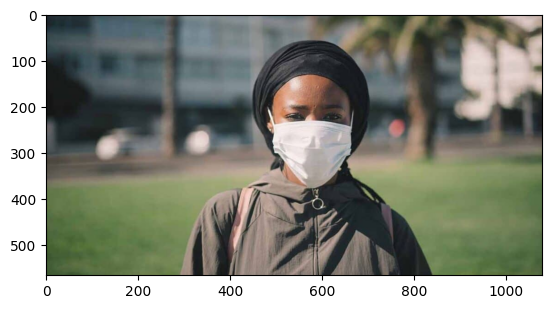

In [40]:
test_image_mask_nomask("/content/drive/MyDrive/test/Train/Mask/face-mask-woman-1080x567.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Person Wearing A Mask


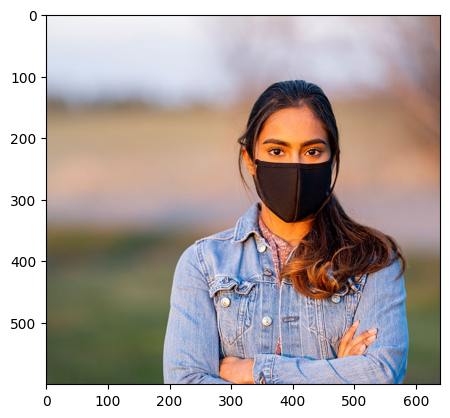

In [20]:
test_image_mask_nomask("/content/drive/MyDrive/test/Test/Mask/mask-myths.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Person Not Wearing A Mask


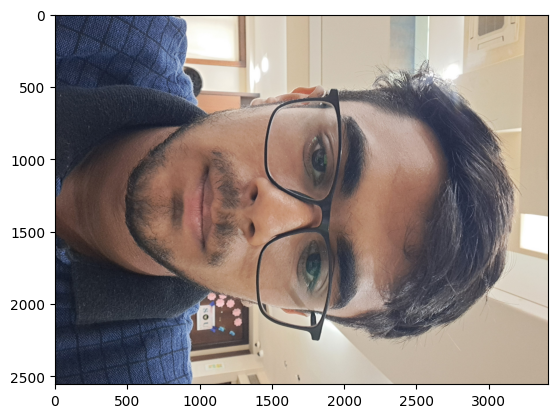

In [24]:
test_image_mask_nomask("/content/drive/MyDrive/test/Train/Non Mask/20241206_105159.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Person Not Wearing A Mask


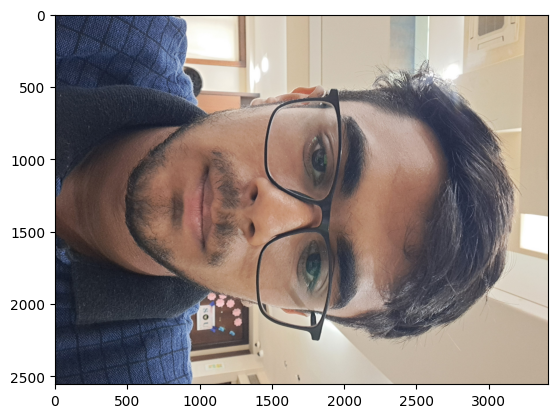

In [33]:
test_image_mask_nomask("/content/drive/MyDrive/test/Train/Non Mask/20241206_105159.jpg")